In [251]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from statsmodels.stats import diagnostic
from scipy import stats
import os

## First step : Data pre-processing

During this step, we will pre-process all the csv files, extract all the informations needed for our project and merge them into two datasets we will use for the project (especially for the **Part I - Temporal analysis of the popularity of biggest breweries and the impact of football World Cups on their sales**).

<br>The final datasets obtained in this part are stored in two different csv files you can find in the folder Final in the GitHub repository : 
- `beer_advocate.csv` : which contains informations on the most rated beers from the website **Beer Advocate**
- `rate_beer.csv` : which contains informations on the most rated beers from the website **Rate Beer**

### 1. Cleaning and pre-processing of the file ```beers_matched.csv```

The first step in our project is to select only the beers with a significant number of ratings as we want to analyze which beers are the most popular over time. Indeed, many beers on both websites have no or few ratings and we therefore cannot analyze the variation in the number of ratings over time. So we have decided to filter them out. <br>

With a first quick overview of the datasets provided we have decided to work on the file *matched_beers*. <br>

**Why ?** Because, we think that the most popular beers (i.e. with an important number of ratings) will be refered on both websites. In an opposite way, the beers we would lose while only working on the *matched_beers* dataset would be the less popular ones with a few number of reviews.  As our analysis will be based on the most popular beers, losing them is not a problem here.

In [252]:
beers = pd.read_csv("Matched/beers_matched.csv", delimiter=",", header=[0,1])
beers.head()

ba                                                                \
   abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
0  4.8  3.45     3.439867                  3.504068     80.0   19827   
1  6.0  3.86     3.888750                  3.768333      NaN   20841   
2  4.2  3.56     3.556094                  3.580417     82.0   20842   
3  4.8  3.96     3.960000                  3.960000      NaN   22659   
4  4.5   NaN          NaN                       NaN      NaN  178681   

                                                         \
            beer_name beer_wout_brewery_name brewery_id   
0            Legbiter               Legbiter      10093   
1   St. Patrick's Ale        Patricks Ale St      10093   
2  St. Patrick's Best       Patricks Best St      10093   
3  St. Patrick's Gold       Patricks Gold St      10093   
4       Sheelin Stout                  Stout      32848   

                                         ...         rb                    \
                           brewery_name  ... brewery_id      brewery_name   
0  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
1  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
2  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
3  Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
4                   The Sheelin Brewery  ...      17616           Sheelin   

                                                                             \
  nbr_matched_valid_ratings nbr_ratings overall_score                 style   
0                        89          89          23.0  Golden Ale/Blond Ale   
1                        11          11          52.0             Irish Ale   
2                        74          74          26.0                Bitter   
3                         4           4           NaN             Amber Ale   
4                         2           2           NaN              Mild Ale   

                           scores       
  style_score    zscore      diff  sim  
0        27.0 -0.698304  1.000000  1.0  
1        79.0  0.005754  0.527141  1.0  
2        25.0 -0.862119  0.527141  1.0  
3         NaN -0.758491  0.527141  1.0  
4         NaN -0.347271  1.000000  1.0  

[5 rows x 33 columns]

In [253]:
print ("Shape of the DataFrame : {size}".format(size = beers.shape))

Shape of the DataFrame : (45640, 33)


To analyse more easily the data in the following steps, let's take off the columns which are unsignificant for the moment. 

In [254]:
beers.columns[20:]

MultiIndex([(    'rb',                   'beer_id'),
            (    'rb',                 'beer_name'),
            (    'rb',    'beer_wout_brewery_name'),
            (    'rb',                'brewery_id'),
            (    'rb',              'brewery_name'),
            (    'rb', 'nbr_matched_valid_ratings'),
            (    'rb',               'nbr_ratings'),
            (    'rb',             'overall_score'),
            (    'rb',                     'style'),
            (    'rb',               'style_score'),
            (    'rb',                    'zscore'),
            ('scores',                      'diff'),
            ('scores',                       'sim')],
           )

In [255]:
beers2 = beers.iloc[:, [5,6, 11, 12, 13, 20, 21, 25, 26]]
beers2

ba                                                            \
      beer_id           beer_name nbr_matched_valid_ratings nbr_ratings   
0       19827            Legbiter                        59          75   
1       20841   St. Patrick's Ale                         6           8   
2       20842  St. Patrick's Best                        48          64   
3       22659  St. Patrick's Gold                         1           1   
4      178681       Sheelin Stout                         0           0   
...       ...                 ...                       ...         ...   
45635   96911            Pale Ale                         3           4   
45636   37457    Mustang Gold Ale                        21          22   
45637   47287        Shanty Irish                         9          10   
45638   37177   Thunderbolt Wheat                        20          21   
45639   36418    Warhawk Pale Ale                        36          38   

                       rb                                      \
      nbr_reviews beer_id                           beer_name   
0              59   37923           Strangford Lough Legbiter   
1               6   41286   Strangford Lough St. Patricks Ale   
2              48   41287  Strangford Lough St. Patricks Best   
3               1   41285  Strangford Lough St. Patricks Gold   
4               0  230283                       Sheelin Stout   
...           ...     ...                                 ...   
45635           3  242782                     Do Can Pale Ale   
45636          21   68764            Warbird Mustang Gold Ale   
45637           9   76984                Warbird Shanty Irish   
45638          20   78298          Warbird Thunderbolt Wheat    
45639          36   68765            Warbird Warhawk Pale Ale   

                                             
      nbr_matched_valid_ratings nbr_ratings  
0                            89          89  
1                            11          11  
2                            74          74  
3                             4           4  
4                             2           2  
...                         ...         ...  
45635                         1           1  
45636                        57          57  
45637                        50          50  
45638                        59          59  
45639                        69          69  

[45640 rows x 9 columns]

We won't need all the beers refered in this dataset.<br>
Indeed we cannot analyse variations through time for beers which only have a few ratings.
As we want to check the popularity of beers over time we only need beers with a high number of ratings.
Therefore, we want to take off all the beers which are unsignificant for our analysis. <br>

Let's first check a basic description of the feature 'nbr_ratings' for each website. 

In [256]:
ba_ratings = beers2.ba.nbr_ratings.describe()
#ba_matched_ratings = beers2.ba.nbr_matched_valid_ratings.describe()
rb_ratings = beers2.rb.nbr_ratings.describe()
#rb_matched_ratings = beers2.rb.nbr_matched_valid_ratings.describe()

stats_ratings = pd.DataFrame({  'ba_ratings' : ba_ratings, 
                                'rb_ratings' : rb_ratings,
                            })

stats_ratings

,ba_ratings,rb_ratings
count,45640.000000,45640.000000
mean,20.945837,22.362796
std,137.768038,80.107455
min,0.000000,0.000000
25%,1.000000,2.000000
50%,3.000000,5.000000
75%,8.000000,16.000000
max,9228.000000,5272.000000


` To check : diff between ba_matched_valid_ratings VS nb_ratings `

We will only focus on the features 'ba_ratings' and 'rb_ratings' as we lose a lot of informations with the feature 'ba_matched_ratings'. <br>
We can see that many beers have no ratings on both websites. Indeed half of the beers have 3 ratings or less on the website *BeerAdvocate* and 5 ratings or less on *RateBeer*. But we can see that the mean is higher for both websites (~21 ratings BA and ~22 for RB). <br>

Now, let's check if the number or ratings of each beer is correlated between the two websites.

c:\Users\affol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


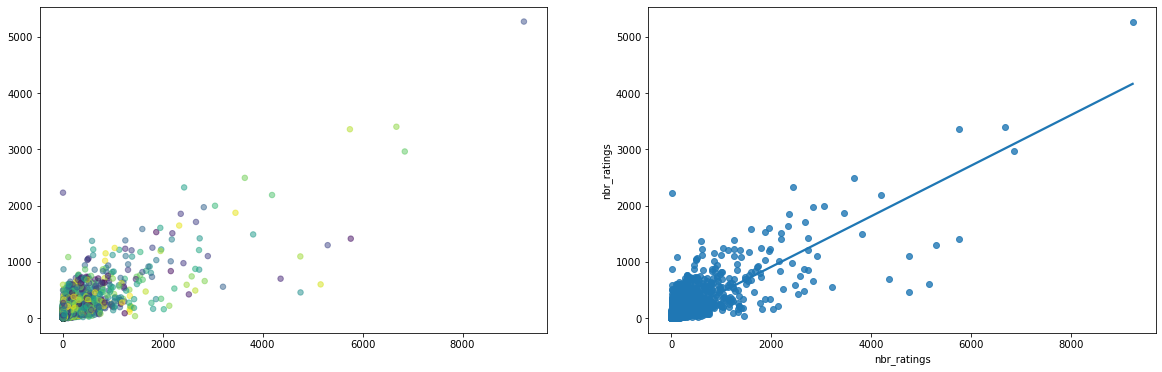

In [257]:
# Plot of the nbr of ratings of each website
plt.figure(figsize=(20,6))

# Scatter plot of the data
plt.subplot(1, 2, 1)
colors = np.random.rand(beers2.shape[0])
plt.scatter(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'], s=30, alpha=0.5, c=colors)
plt.xlabel('Number of ratings on BeerAdvocate')
plt.ylabel('Number of ratings on RateBeer')
plt.title('Number of ratings on both websites')

# Scatter plot with a linear regression 
plt.subplot(1, 2, 2)
sns.regplot(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'], ci=None)
plt.xlabel('Number of ratings on BeerAdvocate')
plt.ylabel('Number of ratings on RateBeer')
plt.title('Number of ratings on both websites ith a linear regression')

plt.show()

In [258]:
print('Pearson coefficient : {pearson}'.format(pearson = stats.pearsonr(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])))
print('Spearman coefficient : {spearman}'.format(spearman = stats.spearmanr(beers2['ba']['nbr_ratings'], beers2['rb']['nbr_ratings'])))

Pearson coefficient : (0.7737549101334047, 0.0)
Spearman coefficient : SpearmanrResult(correlation=0.4941042211279968, pvalue=0.0)


We can see that the number of ratings of each beer from the two websites are very correlated. 
- The p-values of the two tests are equals to 0, so the correlation is very significant.<br><br>
Hence, we can sum the number of ratings from each website in order to filter our data afterwise.

In [259]:
beers2['merged', 'nbr_ratings'] = beers2['ba', 'nbr_ratings'] + beers2['rb', 'nbr_ratings']
beers2.head()

C:\Users\affol\AppData\Local\Temp\ipykernel_72464\1252895236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers2['merged', 'nbr_ratings'] = beers2['ba', 'nbr_ratings'] + beers2['rb', 'nbr_ratings']


ba                                                            \
  beer_id           beer_name nbr_matched_valid_ratings nbr_ratings   
0   19827            Legbiter                        59          75   
1   20841   St. Patrick's Ale                         6           8   
2   20842  St. Patrick's Best                        48          64   
3   22659  St. Patrick's Gold                         1           1   
4  178681       Sheelin Stout                         0           0   

                   rb                                      \
  nbr_reviews beer_id                           beer_name   
0          59   37923           Strangford Lough Legbiter   
1           6   41286   Strangford Lough St. Patricks Ale   
2          48   41287  Strangford Lough St. Patricks Best   
3           1   41285  Strangford Lough St. Patricks Gold   
4           0  230283                       Sheelin Stout   

                                             merged  
  nbr_matched_valid_ratings nbr_ratings nbr_ratings  
0                        89          89         164  
1                        11          11          19  
2                        74          74         138  
3                         4           4           5  
4                         2           2           2

Now, let's look at some basic statistics. 

In [260]:
beers2.merged.nbr_ratings.describe()

count    45640.000000
mean        43.308633
std        206.096912
min          0.000000
25%          4.000000
50%          9.000000
75%         28.000000
max      14500.000000
Name: nbr_ratings, dtype: float64

There are still many beers which don't have many ratings on both websites. Hence, to make our analysis more significant, we have decided to take off all the beers with a number of ratings smaller or equal to the value of the mean. <br>
In fact as the time period 17 years wide having only 10 or less ratings is not meaningful to evaluate the popularity over time. 

In [261]:
# Filter the number of ratings which are less than the mean
mean = beers2.merged.nbr_ratings.mean()
beers_filtered = beers2.loc[beers2['merged']['nbr_ratings'] > mean]
print("Shape before filtering : {s1}\nShape after filtering : {s2}".format(s1=beers.shape[0], s2=beers_filtered.shape[0]))
beers_filtered.head()

Shape before filtering : 45640
Shape after filtering : 7833


ba                                                               \
   beer_id              beer_name nbr_matched_valid_ratings nbr_ratings   
0    19827               Legbiter                        59          75   
2    20842     St. Patrick's Best                        48          64   
42  114436            Brigid Fire                         4           6   
43   69626                 Bronze                        34          53   
50  212312  Goddess Of The Spring                         1           2   

                    rb                                         \
   nbr_reviews beer_id                              beer_name   
0           59   37923              Strangford Lough Legbiter   
2           48   41287     Strangford Lough St. Patricks Best   
42           2  244927       Celt Experience Celt Brigid Fire   
43          34   89894            Celt Experience Celt Bronze   
50           1  326990  Celt Experience Goddess Of The Spring   

                                              merged  
   nbr_matched_valid_ratings nbr_ratings nbr_ratings  
0                         89          89         164  
2                         74          74         138  
42                        83          83          89  
43                       185         185         238  
50                        49          49          51

In [262]:
beers_filtered.merged.nbr_ratings.describe()

count     7833.000000
mean       201.445551
std        465.634521
min         44.000000
25%         59.000000
50%         90.000000
75%        170.000000
max      14500.000000
Name: nbr_ratings, dtype: float64

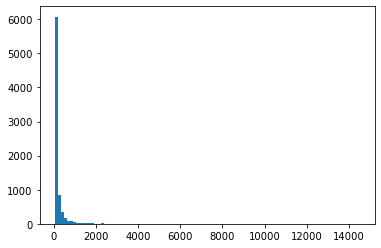

In [263]:
# Plot the distribution of number of ratings on both websites
plt.hist(beers_filtered['merged']['nbr_ratings'], bins = 100)
plt.title('Distribution of the number of ratings on both websites')
plt.show()

The distribution of the number of ratings on the two websites is still unbalanced with 50% of the beers having a value under 90, whereas only 25% of the data is between 170 and 14500. <br>
These 25% are the more relevant for our analysis because only 90 ratings still is not much information, so we would like to only keep those. But as it represent too small a part of the data we will continue with this filtered data for the moment because we would lose a lot of data otherwise. <br>
We keep in mind that observation in the case our analysis turn out to be unsucessful. 

Now, let's go back to the initial DataFrame and filter out the rows we have selected above. 

In [264]:
index_to_filter = beers_filtered.index
new_beers = beers.iloc[index_to_filter,:]
new_beers.head()

ba                                                                \
    abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
0   4.8  3.45     3.439867                  3.504068     80.0   19827   
2   4.2  3.56     3.556094                  3.580417     82.0   20842   
42  6.3  3.90     3.893333                  3.780000      NaN  114436   
43  4.5  3.71     3.691509                  3.732353     84.0   69626   
50  6.0  3.72     3.755000                  3.690000      NaN  212312   

                                                             \
                beer_name beer_wout_brewery_name brewery_id   
0                Legbiter               Legbiter      10093   
2      St. Patrick's Best       Patricks Best St      10093   
42            Brigid Fire            Fire Brigid      20776   
43                 Bronze                 Bronze      20776   
50  Goddess Of The Spring      Spring Goddess Of      20776   

                                          ...         rb                    \
                            brewery_name  ... brewery_id      brewery_name   
0   Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
2   Strangford Lough Brewing Company Ltd  ...       4959  Strangford Lough   
42                   The Celt Experience  ...      14338   Celt Experience   
43                   The Celt Experience  ...      14338   Celt Experience   
50                   The Celt Experience  ...      14338   Celt Experience   

                                                                              \
   nbr_matched_valid_ratings nbr_ratings overall_score                 style   
0                         89          89          23.0  Golden Ale/Blond Ale   
2                         74          74          26.0                Bitter   
42                        83          83          87.0       Specialty Grain   
43                       185         185          52.0                Bitter   
50                        49          49          78.0                Saison   

                            scores            
   style_score    zscore      diff       sim  
0         27.0 -0.698304  1.000000  1.000000  
2         25.0 -0.862119  0.527141  1.000000  
42        96.0  0.190947  1.000000  1.000000  
43        92.0 -0.346027  1.000000  1.000000  
50        58.0  0.017223  0.603086  0.915537  

[5 rows x 33 columns]

In [265]:
new_beers.to_csv('Matched/beers_matched_filtered.csv', sep=',')

We keep some values we will need in the next parts of our data pre-processing. 

In [8]:
# Storing the beer ids
beer_ids_ba = new_beers.ba.beer_id
beer_ids_rb = new_beers.rb.beer_id

NameError: name 'new_beers' is not defined

### Is it clever to only use the file ```beers_matched.csv```? 

In order to be sure that we are not losing too much informations while only keeping the beers from the file *matched_beers*, we want to check if doing the same work with the beer files of *RateBeer* and *BeerAdvocate* separately will give the same number of beers after filtering out the ones with very few ratings.

In [9]:
# Import the beers files
beers_matched = beers
beers_rb = pd.read_csv('RateBeer/beers_rb.csv', delimiter=',')
beers_ba = pd.read_csv('BeerAdvocate/beers_ba.csv', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: 'RateBeer/beers_rb.csv'

In [268]:
# Compare descriptions from the different datasets

rb_ratings_matched = beers_matched.rb.nbr_ratings.describe()   #Stats from the merged dataset before filtering
ba_ratings_matched = beers_matched.ba.nbr_ratings.describe()   #Stats from the merged dataset before filtering

rb_ratings = beers_rb.nbr_ratings.describe()

ba_ratings = beers_ba.nbr_ratings.describe()

compare_rb_ratings = pd.DataFrame({
                                    'RB before filtering' : rb_ratings,
                                    'Merged RB before filtering' : rb_ratings_matched,
                                    'BA before filtering' : ba_ratings,
                                    'Merged BA before filtering' : ba_ratings_matched,

                                    })
compare_rb_ratings

,RB before filtering,Merged RB before filtering,BA before filtering,Merged BA before filtering
count,442081.000000,45640.000000,280823.000000,45640.000000
mean,16.110337,22.362796,29.887267,20.945837
std,80.988812,80.107455,231.010063,137.768038
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000
50%,3.000000,5.000000,2.000000,3.000000
75%,9.000000,16.000000,8.000000,8.000000
max,5272.000000,5272.000000,16509.000000,9228.000000


Our first idea to work on the merged dataset to select beers with the highest number of ratings might not be the best one given the results obtained above.<br>

- First, we are losing a lot of beers. Even if some beers are similar in both of the websites, we have 443 081 beers on *RateBeer* and 280 823 on *BeerAdvocate*, whereas only 45 640 on the merged dataset. We don't want to lose all this information. 
- Secondly, we can see that the maximum number of ratings is equal to 16 509 on the *BeerAdvocate* dataset, which is a very important information for us. On the matched beer dataset, the highest value is only 9 228, almost the half of the one on BA. We are losing information on the merged dataset and moreover, these informations are crucial for us. 

Now, let's filter out for the BA and RB datasets the beers with a number or ratings smaller than the mean (~16 for *RateBeer* and ~29 for *BeerAdvocate*).

In [269]:
# Filter the number of ratings which are less than the mean
beers_rb_filtered = beers_rb.loc[beers_rb['nbr_ratings']>beers_rb.nbr_ratings.mean()]
beers_ba_filtered = beers_ba.loc[beers_ba['nbr_ratings']>beers_ba.nbr_ratings.mean()]
beers_matched_filtered = beers_filtered

In [270]:
# Compare descriptions from the filtered data
rb_ratings_matched_filtered = beers_matched_filtered.rb.nbr_ratings.describe()   #Stats from the merged dataset before filtering
ba_ratings_matched_filtered = beers_matched_filtered.ba.nbr_ratings.describe()   #Stats from the merged dataset before filtering
ratings_matched_filtered = beers_matched_filtered.merged.nbr_ratings.describe()   #Stats from the merged dataset before filtering

rb_ratings_filtered = beers_rb_filtered.nbr_ratings.describe()

ba_ratings_filtered = beers_ba_filtered.nbr_ratings.describe()

compare_ratings_filtered = pd.DataFrame({
                                    'RB after filtering' : rb_ratings_filtered,
                                    'Merged RB after filtering' : rb_ratings_matched_filtered,
                                    'BA after filtering' : ba_ratings_filtered,
                                    'Merged BA after filtering' : ba_ratings_matched_filtered,
                                    'Merged BA+RB after filtering' : ratings_matched_filtered,

                                    })
compare_ratings_filtered                               

,RB after filtering,Merged RB after filtering,BA after filtering,Merged BA after filtering,Merged BA+RB after filtering
count,69192.000000,7833.000000,28852.000000,7833.000000,7833.000000
mean,84.408053,99.581514,254.520345,101.864037,201.445551
std,190.538177,172.908450,680.384027,320.223425,465.634521
min,17.000000,1.000000,30.000000,0.000000,44.000000
25%,23.000000,32.000000,44.000000,8.000000,59.000000
50%,36.000000,56.000000,77.000000,35.000000,90.000000
75%,70.000000,102.000000,184.000000,78.000000,170.000000
max,5272.000000,5272.000000,16509.000000,9228.000000,14500.000000


Now, we have something interesting.<br><br> 
First, we can see that we get so much interesting results for the *BeerAdvocate* dataset after filtering compared to the merged one. Indeed, we still many more beers (28 852 vs 7 833), the mean is higher (254 vs 101, more than the double), and 25% (~7213) of the beers have a number of ratings greater than 184, which is almost the number of beers we have in the matched dataset. 
<br><br>
Moreover, we get the same observations while comparing the *BeerAdvocate* dataset after filtering and the merged one with the sum of the ratings on the two websites for the matched beers ('Merged RA + RB after filtering'). The mean is higher on *BeerAdvocate* (254 vs 201), the max also (16 509 vs 14 500) and we have 7 214 beers with a number of ratings greater than 184 vs 1 958 for the merged RA + RB ! 
<br><br>
Finally, the *RateBeer* dataset has more beers than *BeerAdvocate* (691 192 vs 28 852), but the mean and the median are less important, which means that it contains many more small values. Indeed, the 75% quantile is equals to 70 for *BeerAdvocate*, which is smaller than the value of the 50% quantile of the *BeerAdvocate* dataset after filtering. 
<br><br>
**Solutions**
- We will not work on the merged dataset. 
- During our project, we will work independently on the datasets from the two websites and in the final step, we will compare and merge our results. 
- We will continue to filter out some beers from the *RateBeer* and *BeerAdvocate* datasets by taking off the beers whose the number of ratings is smaller than the value of the 75% quantile for RB and the median for BA. 

In [271]:
quantile_75_rb = beers_rb_filtered.nbr_ratings.quantile(q=0.75)
quantile_75_ba = beers_ba_filtered.nbr_ratings.quantile(q=0.5)

In [272]:
# Filter the number of ratings which are less than the 75% quantile
beers_rb_filtered2 = beers_rb.loc[beers_rb['nbr_ratings']>quantile_75_rb]
rb_ratings_filtered2 = beers_rb_filtered2.nbr_ratings.describe()

beers_ba_filtered2 = beers_ba.loc[beers_ba['nbr_ratings']>quantile_75_ba]
ba_ratings_filtered2 = beers_ba_filtered2.nbr_ratings.describe()

In [273]:
# Compare descriptions 
ratings_final = pd.DataFrame({
                                'RB after filtering' : rb_ratings_filtered2,
                                'BA after filtering' : ba_ratings_filtered2,
                            })
ratings_final

,RB after filtering,BA after filtering
count,17224.000000,14363.000000
mean,240.261960,463.499617
std,336.032576,918.033452
min,71.000000,78.000000
25%,92.000000,112.000000
50%,132.000000,185.000000
75%,236.250000,413.000000
max,5272.000000,16509.000000


Finally, we write the two filtered datasets we are going use during the project in two different files. 

In [274]:
beers_ba_filtered2.to_csv('BeerAdvocate/beers_ba_filtered.csv')
beers_rb_filtered2.to_csv('RateBeer/beers_rb_filtered.csv')

In [275]:
# Storing the ids 
ids_ba_filtered = beers_ba_filtered2.beer_id.values
ids_rb_filtered = beers_rb_filtered2.beer_id.values

### 2. Retrieve the dates associated to each beer review from both website

In order to see the evolution of the ratings over time, we need to know the specific dates of the beer reviews. <br>
As the file is huge and therefore cannot be opened at once we had to split the file using the Unix command <br>`split -l 500000 -d --additional-suffix=.txt $FileName ratings.txt`<br><br>
Then we applied the following algorithm to extract the dates and the beer id of each review.<br>
Finally we stored the results in csv files. 

In [276]:
def extract_ids_dates_ratings(file_folder, nb_iters_start, nb_iters_stop):
    """
    To extract the beer_id and the date from the file ratings.txt. 
    First, do not forget to run 'split -l 500000 -d --additional-suffix=.txt $FileName ratings.txt'

    Args : 
    file_folder : name of the folder you have your splitted files
    nb_iters_start : number of the first splitted file you want to extract
    nb_iters_stop : number of the last splitted file you want to extract

    Returns : 
    beer_ids : list of the beer_ids extracted 
    beer_dates : list of the dates of the ratings extracted
    """
    beer_ids = []
    beer_dates = []
    for i in range(nb_iters_start, nb_iters_stop) :
        if i < 10 :
            name = file_folder + '/x0' + str(i) +'.txt'
        else : 
            name = file_folder + '/x' + str(i) +'.txt'

        fic = open(name, mode='r', encoding='utf-8')
        for line in fic : 
            if line.startswith('beer_id') :
                split = line.split()
                beer_ids.append(split[1])
            if line.startswith('date') :
                split = line.split()
                beer_dates.append(split[1])
        fic.close()
        os.remove(name)
    return beer_ids, beer_dates

In [277]:
#For RateBeer, run the following lines
""" 
beer_ids, beer_dates = extract_ids_dates_ratings(0, 90)
beer_ids2, beer_dates2 = extract_ids_dates_ratings(9000, 9153)
ids = beer_ids + beer_ids2
dates = beer_dates + beer_dates2

ids_dates_rb = pd.DataFrame({
                            'beer_id' : ids,
                            'dates' : dates
                            })

ids_dates_rb['dates'] = pd.to_datetime(ids_dates_rb['dates'],unit='s')
ids_dates_rb.to_csv('RateBeer/ids_dates_rb.csv', index=False)
"""

#For BeerAdvocate, run the following lines
""" 
beer_ids, beer_dates = extract_ids_dates_ratings(0, 90)
beer_ids2, beer_dates2 = extract_ids_dates_ratings(9000, #Check the nb of the last splitted file)
ids = beer_ids + beer_ids2
dates = beer_dates + beer_dates2

ids_dates_ba = pd.DataFrame({
                            'beer_id' : ids,
                            'dates' : dates
                            })

ids_dates_ba['dates'] = pd.to_datetime(ids_dates_ba['dates'],unit='s')
ids_dates_ba.to_csv('BeerAdvocate/ids_dates_rb.csv', index=False)
"""

" \nbeer_ids, beer_dates = extract_ids_dates_ratings(0, 90)\nbeer_ids2, beer_dates2 = extract_ids_dates_ratings(9000, #Check the nb of the last splitted file)\nids = beer_ids + beer_ids2\ndates = beer_dates + beer_dates2\n\nids_dates_ba = pd.DataFrame({\n                            'beer_id' : ids,\n                            'dates' : dates\n                            })\n\nids_dates_ba['dates'] = pd.to_datetime(ids_dates_ba['dates'],unit='s')\nids_dates_ba.to_csv('BeerAdvocate/ids_dates_rb.csv', index=False)\n"

### 3. Pre-processing the new datasets *ids_dates_ba* and *ids_dates_rb*

Now that we retrieved the dates of each rating on both websites, we will pre-process these two datasets. 
- First we group the dates of each rating by their beer id
- Then we keep the beers that we filtered in the first part (beers with a significant number of ratings). 
- Finally we create a dataframe which contains for each beer the list of dates for which this beer was rated.

In [278]:
# For BeerAdvocate
dates_ba = pd.read_csv('BeerAdvocate/ids_dates_ba.csv', delimiter = ',')
serie = dates_ba.groupby(["beer_id"]).apply(lambda x : list(x['dates']))
dates_ba_agg = pd.DataFrame({
                            'beer_id' : serie.index, 
                            'dates' : serie.values
                            })
dates_filtered_ba = dates_ba_agg.loc[dates_ba_agg.beer_id.isin(ids_ba_filtered)]
dates_filtered_ba['nb_ratings'] = dates_filtered_ba['dates'].str.len()

dates_filtered_ba

C:\Users\affol\AppData\Local\Temp\ipykernel_72464\3007453507.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_filtered_ba['nb_ratings'] = dates_filtered_ba['dates'].str.len()


,beer_id,dates,nb_ratings
2,5,"[2017-07-23 10:00:00, 2017-07-20 10:00:00, 201...",1680
3,6,"[2017-07-18 10:00:00, 2017-07-16 10:00:00, 201...",2894
4,7,"[2017-07-23 10:00:00, 2017-07-22 10:00:00, 201...",3293
5,8,"[2015-06-17 10:00:00, 2014-12-11 11:00:00, 201...",140
6,9,"[2016-08-14 10:00:00, 2016-06-18 10:00:00, 201...",228
...,...,...,...
239710,282982,"[2017-07-27 10:00:00, 2017-07-25 10:00:00, 201...",85
240065,283410,"[2017-07-28 10:00:00, 2017-07-26 10:00:00, 201...",113
240150,283511,"[2017-07-27 10:00:00, 2017-07-26 10:00:00, 201...",112
242750,286588,"[2017-07-28 10:00:00, 2017-07-27 10:00:00, 201...",113


In [279]:
# For RateBeer
dates_rb = pd.read_csv('RateBeer/ids_dates_rb.csv', delimiter = ',')
serie = dates_rb.groupby(["beer_id"]).apply(lambda x : list(x['dates']))
dates_rb_agg = pd.DataFrame({
                            'beer_id' : serie.index, 
                            'dates' : serie.values
                            })
dates_filtered_rb = dates_rb_agg.loc[dates_rb_agg.beer_id.isin(ids_rb_filtered)]
dates_filtered_rb['nb_ratings'] = dates_filtered_rb['dates'].str.len()

dates_filtered_rb

C:\Users\affol\AppData\Local\Temp\ipykernel_72464\4151445159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_filtered_rb['nb_ratings'] = dates_filtered_rb['dates'].str.len()


,beer_id,dates,nb_ratings
0,1,"[2017-05-31 10:00:00, 2017-04-28 10:00:00, 201...",1059
1,2,"[2017-07-20 10:00:00, 2017-07-17 10:00:00, 201...",915
2,3,"[2017-07-14 10:00:00, 2017-07-09 10:00:00, 201...",682
3,4,"[2017-04-04 10:00:00, 2017-03-02 11:00:00, 201...",427
4,5,"[2016-12-31 11:00:00, 2016-12-29 11:00:00, 201...",566
...,...,...,...
379055,510696,"[2017-07-27 10:00:00, 2017-06-22 10:00:00, 201...",151
379436,511219,"[2017-07-28 10:00:00, 2017-07-28 10:00:00, 201...",74
381188,513447,"[2017-07-23 10:00:00, 2017-07-16 10:00:00, 201...",104
386641,520884,"[2017-07-26 10:00:00, 2017-07-26 10:00:00, 201...",72


In [280]:
# Filtered dataset with all the infos on 1 beer
beers_ba_init = beers_ba_filtered2       
beers_rb_init = beers_rb_filtered2

In [281]:
# Merging the beers information with the dates
beers_ba = pd.merge(beers_ba_init, dates_filtered_ba, how='inner', on=['beer_id'])
beers_rb = pd.merge(beers_rb_init, dates_filtered_rb, how='inner', on=['beer_id'])
beers_rb.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,dates,nb_ratings
0,132596,Clanconnel #6 McGraths Irish Black Stout,12090,Clanconnel,Dry Stout,79,67.0,71.0,3.32,4.3,3.343038,NaN,0,NaN,"[2017-05-08 10:00:00, 2017-05-08 10:00:00, 201...",79
1,63241,College Green Headless Dog,2099,Hilden,Amber Ale,80,26.0,31.0,2.88,4.3,2.886250,NaN,0,NaN,"[2017-07-23 10:00:00, 2017-06-14 10:00:00, 201...",80
2,58329,College Green Mollys Chocolate Stout,2099,Hilden,Stout,76,45.0,28.0,3.12,4.3,3.132895,NaN,0,NaN,"[2017-02-26 11:00:00, 2013-03-20 11:00:00, 201...",76
3,92716,Hilden Barneys Brew,2099,Hilden,Spice/Herb/Vegetable,80,27.0,35.0,2.89,5.0,2.883750,NaN,0,NaN,"[2017-06-13 10:00:00, 2017-06-13 10:00:00, 201...",80
4,155275,Hilden Twisted Hop,2099,Hilden,Golden Ale/Blond Ale,77,57.0,92.0,3.25,4.7,3.257143,NaN,0,NaN,"[2017-07-23 10:00:00, 2017-01-27 11:00:00, 201...",77


Let's have a quick check on the data to see if everything went well.

In [282]:
assert(beers_rb_init.shape[0] == beers_rb.shape[0])
assert(beers_ba_init.shape[0] == beers_ba.shape[0])
assert(beers_ba.nbr_ratings.values.all() == beers_ba.nb_ratings.values.all())
assert(beers_rb.nbr_ratings.values.all() == beers_rb.nb_ratings.values.all())

In [283]:
# Drop the column nb_ratings (only for check up)
beers_ba.drop('nb_ratings', axis=1, inplace=True)
beers_rb.drop('nb_ratings', axis=1, inplace=True)

In [284]:
# Save the modifications 
beers_ba.to_csv('BeerAdvocate/beers_ba_filtered.csv', index=False)
beers_rb.to_csv('RateBeer/beers_rb_filtered.csv', index=False)

### 4. Focus on breweries

Now we want to analyze the popularity of the berrs from different breweries over time. Therefore we are going to group beers by breweries.
<br> <br>
**Our objective** is to determine the **relation** between **major sporting events** and the **sale of beers from certain breweries**. 
<br><br>
Indeed, does the fact that some breweries are sponsors of this type of events have a strong impact on the sale of their products? Is this impact positive or negative? 
<br><br> 
Can we observe a difference in consumption between the users of countries that win/lose a match?
Do the countries that win a match consume more beer? Are the comments more cheerful, positive when the team has won a match? 

In [285]:
beers_per_brewery_ba = beers_ba.groupby('brewery_id').beer_id.count()
beers_per_brewery_ba

brewery_id
1         2
3        43
4        65
5         4
6         3
         ..
46938     1
47051     1
47536     1
47847     1
49125     2
Name: beer_id, Length: 1751, dtype: int64

In [286]:
beers_per_brewery_rb = beers_rb.groupby('brewery_id').beer_id.count()
beers_per_brewery_rb

brewery_id
1        30
2         1
3        24
4        26
6         3
         ..
28698     1
29144    25
29858     6
31254     1
31872     2
Name: beer_id, Length: 2572, dtype: int64

In [287]:
# Compare description on both websites
stats_brewery_ba = beers_per_brewery_ba.describe()
stats_brewery_rb = beers_per_brewery_rb.describe()

stats_brewery = pd.DataFrame({
                                'BA' : stats_brewery_ba,
                                'RB' : stats_brewery_rb
                            })
stats_brewery

,BA,RB
count,1751.000000,2572.000000
mean,8.202741,6.696734
std,15.623591,10.124189
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,8.000000,7.000000
max,177.000000,108.000000


Let's visualize the results obtained in order to interpret them. 

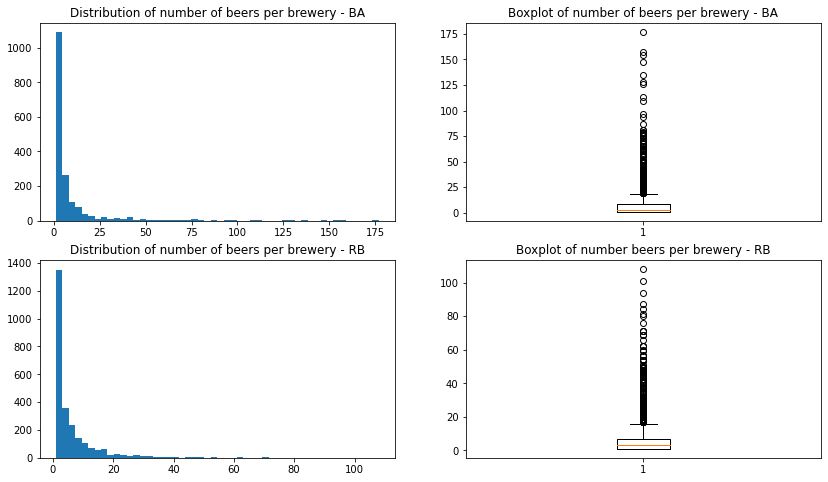

In [288]:
# Plot the groupby results
fig = plt.figure(figsize = (14, 8))

# Distribution of number of beers per brewery on BeerAdvocate
plt.subplot(2,2,1)
plt.hist(beers_per_brewery_ba, bins = 50)
plt.title('Distribution of number of beers per brewery - BA')

# Boxplot of number of beers per brewery on BeerAdvocate
plt.subplot(2,2,2)
plt.boxplot(beers_per_brewery_ba)
plt.title('Boxplot of number of beers per brewery - BA')

# Distribution of number of beers per brewery on RateBeer
plt.subplot(2,2,3)
plt.hist(beers_per_brewery_rb, bins = 50)
plt.title('Distribution of number of beers per brewery - RB')

# Boxplot of number beers per brewery on RateBeer
plt.subplot(2,2,4)
plt.boxplot(beers_per_brewery_rb)
plt.title('Boxplot of number beers per brewery - RB')
plt.show()

The number of beers per brewery is quite the same on both datasets. <br>
The distribution of the number of beers per brewery follows a skewed distribution as we can see on the histograms and the boxplots.<br> 
The mean is around 8 beers per brewery for BeerAdvocate and 7 beers per brewery for RateBeer, whereas the median value is equal to 3 for both datasets. 
<br> 
At first sight we would like to take off the breweries with a low supply of products as one may think that large breweries that can afford publicity for big sporting events won't sell only 3 different beers. 
<br><br> 
Let's compare the number of beers per breweries and the total number of reviews per brewery. Thus, if the two are related our hypothesis stands and we will only keep breweries with a large offer of beers for our project. 

In [289]:
ratings_per_brewery_rb = beers_rb.groupby('brewery_id').nbr_ratings.sum()
ratings_per_brewery_ba = beers_ba.groupby('brewery_id').nbr_ratings.sum()

In [304]:
agg_res_rb = pd.merge(beers_per_brewery_rb, ratings_per_brewery_rb, how='inner', on=ratings_per_brewery_rb.index)
agg_res_rb.rename(columns= {'beer_id':'nbr_beers', 'key_0' : 'brewery_id'}, inplace=True)
agg_res_rb.set_index("brewery_id", inplace=True)

agg_res_ba = pd.merge(beers_per_brewery_ba, ratings_per_brewery_ba, how='inner', on=ratings_per_brewery_ba.index)
agg_res_ba.rename(columns= {'beer_id':'nbr_beers', 'key_0' : 'brewery_id'}, inplace=True)
agg_res_ba.set_index("brewery_id", inplace=True)

In [305]:
print('Rate Beer')
print('PearsonResult', stats.pearsonr(agg_res_rb.nbr_beers, agg_res_rb.nbr_ratings))
print(stats.spearmanr(agg_res_rb.nbr_beers, agg_res_rb.nbr_ratings))
print('Beer Advocate')
print('PearsonResult', stats.pearsonr(agg_res_ba.nbr_beers, agg_res_ba.nbr_ratings))
print(stats.spearmanr(agg_res_ba.nbr_beers, agg_res_ba.nbr_ratings))

Rate Beer
PearsonResult (0.8583367103247033, 0.0)
SpearmanrResult(correlation=0.9412354438995086, pvalue=0.0)
Beer Advocate
PearsonResult (0.8278290593299362, 0.0)
SpearmanrResult(correlation=0.9200760194948664, pvalue=0.0)


We can see directly that the total number of ratings and the number of beers per brewery are **highly correlated**. Indeed for both Pearson and Spearman tests for each website we get a coefficient which is very close to 1 and a null p-value. 
Hence, these results confirm our hypothesis that the biggest and most popular breweries are offering a large scale of products.
<br><br>
Let's plot the number of beers and ratings per brewery.

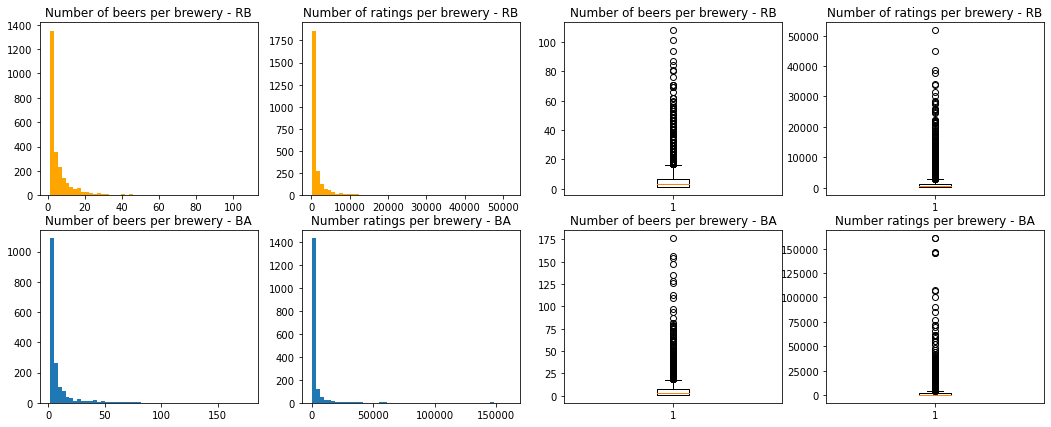

In [317]:
# Plot 
fig = plt.figure(figsize = (18, 7))

# Distribution of the number of beers per brewery on RateBeer
plt.subplot(2,4,1)
plt.hist(agg_res_rb.nbr_beers, bins = 50, color = 'orange')
plt.title('Number of beers per brewery - RB')

# Distribution of the number of ratings per brewery on RateBeer
plt.subplot(2,4,2)
plt.hist(agg_res_rb.nbr_ratings, bins = 50, color = 'orange')
plt.title('Number of ratings per brewery - RB')

# Distribution of the number of beers per brewery on BeerAdvocate
plt.subplot(2,4,5)
plt.hist(agg_res_ba.nbr_beers, bins = 50)
plt.title('Number of beers per brewery - BA')

# Distribution of the number ratings per brewery on BeerAdvocate
plt.subplot(2,4,6)
plt.hist(agg_res_ba.nbr_ratings, bins = 50)
plt.title('Number ratings per brewery - BA')


# Boxplot of the number of beers per brewery on RateBeer
plt.subplot(2,4,3)
plt.boxplot(agg_res_rb.nbr_beers)
plt.title('Number of beers per brewery - RB')

# Boxplot of the number of ratings per brewery on RateBeer
plt.subplot(2,4,4)
plt.boxplot(agg_res_rb.nbr_ratings)
plt.title('Number of ratings per brewery - RB')

# Boxplot of the number of beers per brewery on BeerAdvocate
plt.subplot(2,4,7)
plt.boxplot(agg_res_ba.nbr_beers)
plt.title('Number of beers per brewery - BA')

# Boxplot of the number ratings per brewery on BeerAdvocate
plt.subplot(2,4,8)
plt.boxplot(agg_res_ba.nbr_ratings)
plt.title('Number ratings per brewery - BA')
plt.show()

In [321]:
stats_results = pd.DataFrame({
                                'BA - nbr_beers' : agg_res_ba.nbr_beers.describe(),
                                'BA - nbr_ratings' : agg_res_ba.nbr_ratings.describe(),
                                'RB - nbr_beers' : agg_res_rb.nbr_beers.describe(),
                                'RB - nbr_bratings' : agg_res_rb.nbr_ratings.describe(),
                            })
stats_results

,BA - nbr_beers,BA - nbr_ratings,RB - nbr_beers,RB - nbr_bratings
count,1751.000000,1751.000000,2572.000000,2572.000000
mean,8.202741,3801.967447,6.696734,1608.970451
std,15.623591,12463.223652,10.124189,3790.459598
min,1.000000,78.000000,1.000000,71.000000
25%,1.000000,182.000000,1.000000,153.000000
50%,3.000000,507.000000,3.000000,419.500000
75%,8.000000,1904.000000,7.000000,1255.000000
max,177.000000,161326.000000,108.000000,51804.000000


**Interpretation**
- We can see on the visualization above what we have seen before. Indeed the distributions of the number of ratings per brewery and the number of beers per brewery look the same even if the values haven't the same scale. 
- Many breweries still have number of beers/ratings which is too small for the purpose of our project. Hence, we have decided to continue our analysis with a smaller set of data. Using the same process as in part 1, we'll now focus on the breweries whose the number of proposed beers is greater than the value of the 75% quantile. 

To finish our pre-processing of the breweries, we will filter out the ones with a less important number of beers and thus with less ratings. 

In [344]:
# Retrieve the index of the beers which are higher than the 75% quantile of the distribution.
quantile_75_ba = agg_res_ba.nbr_beers.quantile(0.75)
new_ba = agg_res_ba.loc[agg_res_ba.nbr_beers >= quantile_75_ba]
index_ba = new_ba.index

quantile_75_rb = agg_res_rb.nbr_beers.quantile(0.75)
new_rb = agg_res_rb.loc[agg_res_rb.nbr_beers >= quantile_75_rb]
index_rb = new_rb.index

print("Number of beer in the BeerAdvocate filtered dataset : ", len(index_ba))
print("Number of beer in the RateBeer filtered dataset : ", len(index_rb))

Number of beer in the BeerAdvocate filtered dataset :  455
Number of beer in the RateBeer filtered dataset :  730


In [345]:
# Filter the dataframes
beers_rb_filtered = beers_rb.loc[beers_rb['brewery_id'].isin(index_rb)]
beers_ba_filtered = beers_ba.loc[beers_ba['brewery_id'].isin(index_ba)]

assert(beers_rb_filtered.value_counts('brewery_id').shape[0] == len(index_rb))
assert(beers_ba_filtered.value_counts('brewery_id').shape[0] == len(index_ba))

In [346]:
# For a nice visualization of the data 
beers_rb_filtered.set_index(['brewery_id', 'beer_id'])[['beer_name', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates']]

beer_name  \
brewery_id beer_id                                                      
5973       4580                                 Cave Creek Chili Beer   
           26757                                Cerveza Mexicali Beer   
           82330                           Cerveza Mexicali Dark Beer   
           218798      Dia De Los Muertos Death Becomes You Amber Ale   
           218799   Dia De Los Muertos Death Rides a Pale Horse Bl...   
...                                                               ...   
443        2549        Zlatý Baant (12% / Golden Pheasant / Premium)   
           10165                                     Zlatý Baant 10%   
           235104                      Zlatý Baant 19% Medový Porter   
           91581                               Zlatý Baant Tmavé 10%   
           24292     Zlatý Baant Tmavy 11.5 % (Golden Pheasant Dark)   

                                          brewery_name  \
brewery_id beer_id                                       
5973       4580     Cervecería Mexicana (Grupo Modelo)   
           26757    Cervecería Mexicana (Grupo Modelo)   
           82330    Cervecería Mexicana (Grupo Modelo)   
           218798   Cervecería Mexicana (Grupo Modelo)   
           218799   Cervecería Mexicana (Grupo Modelo)   
...                                                ...   
443        2549                     Heineken Slovensko   
           10165                    Heineken Slovensko   
           235104                   Heineken Slovensko   
           91581                    Heineken Slovensko   
           24292                    Heineken Slovensko   

                                     style  nbr_ratings   avg  \
brewery_id beer_id                                              
5973       4580       Spice/Herb/Vegetable          851  1.37   
           26757                Pale Lager          169  1.95   
           82330        Amber Lager/Vienna          106  2.66   
           218798                Amber Ale          175  2.87   
           218799     Golden Ale/Blond Ale          152  2.67   
...                                    ...          ...   ...   
443        2549     Czech Pilsner (Světlý)          904  2.68   
           10165    Czech Pilsner (Světlý)           77  2.49   
           235104                   Porter           84  3.45   
           91581              Dunkel/Tmavý          163  2.91   
           24292              Dunkel/Tmavý           73  2.96   

                                                                dates  
brewery_id beer_id                                                     
5973       4580     [2017-06-22 10:00:00, 2017-05-10 10:00:00, 201...  
           26757    [2017-06-20 10:00:00, 2017-05-13 10:00:00, 201...  
           82330    [2017-06-19 10:00:00, 2017-05-27 10:00:00, 201...  
           218798   [2017-06-27 10:00:00, 2017-06-18 10:00:00, 201...  
           218799   [2017-07-22 10:00:00, 2017-06-28 10:00:00, 201...  
...                                                               ...  
443        2549     [2017-07-28 10:00:00, 2017-07-27 10:00:00, 201...  
           10165    [2017-07-24 10:00:00, 2017-06-26 10:00:00, 201...  
           235104   [2017-07-23 10:00:00, 2017-07-20 10:00:00, 201...  
           91581    [2017-07-24 10:00:00, 2017-07-23 10:00:00, 201...  
           24292    [2017-05-24 10:00:00, 2015-09-02 10:00:00, 201...  

[12559 rows x 6 columns]

In [343]:
# For a nice visualization of the data
beers_ba_filtered.set_index(['brewery_id', 'beer_id'])[['beer_name', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates']]

beer_name  \
brewery_id beer_id                                                  
323        4720                                  Bitter & Twisted   
           96705                                    Ola Dubh 1991   
           41037                      Ola Dubh Special Reserve 12   
           41012                      Ola Dubh Special Reserve 16   
           47581                      Ola Dubh Special Reserve 18   
...                                                           ...   
565        5222                                       Celis White   
           1505         Michigan Brewing High Seas India Pale Ale   
           4552                Michigan Brewing Mackinac Pale Ale   
           2060                    Michigan Brewing Nut Brown Ale   
           12988    Michigan Brewing Screamin' Pumpkin Spiced Ale   

                                brewery_name                    style  \
brewery_id beer_id                                                      
323        4720     Harviestoun Brewery Ltd.         English Pale Ale   
           96705    Harviestoun Brewery Ltd.                  Old Ale   
           41037    Harviestoun Brewery Ltd.                  Old Ale   
           41012    Harviestoun Brewery Ltd.                  Old Ale   
           47581    Harviestoun Brewery Ltd.                  Old Ale   
...                                      ...                      ...   
565        5222     Michigan Brewing Company                  Witbier   
           1505     Michigan Brewing Company             American IPA   
           4552     Michigan Brewing Company  American Pale Ale (APA)   
           2060     Michigan Brewing Company        English Brown Ale   
           12988    Michigan Brewing Company              Pumpkin Ale   

                    nbr_ratings   avg  \
brewery_id beer_id                      
323        4720             447  3.74   
           96705            109  4.24   
           41037            834  4.13   
           41012            628  4.12   
           47581            457  4.20   
...                         ...   ...   
565        5222             325  3.77   
           1505             201  3.76   
           4552             100  3.40   
           2060              92  3.68   
           12988            131  3.87   

                                                                dates  
brewery_id beer_id                                                     
323        4720     [2017-06-04 10:00:00, 2017-05-27 10:00:00, 201...  
           96705    [2016-09-10 10:00:00, 2016-08-24 10:00:00, 201...  
           41037    [2017-07-24 10:00:00, 2017-07-10 10:00:00, 201...  
           41012    [2017-07-12 10:00:00, 2017-06-06 10:00:00, 201...  
           47581    [2017-07-24 10:00:00, 2017-07-12 10:00:00, 201...  
...                                                               ...  
565        5222     [2015-12-15 11:00:00, 2015-11-16 11:00:00, 201...  
           1505     [2015-06-08 10:00:00, 2015-06-06 10:00:00, 201...  
           4552     [2015-02-28 11:00:00, 2014-12-07 11:00:00, 201...  
           2060     [2015-01-28 11:00:00, 2014-12-07 11:00:00, 201...  
           12988    [2015-09-17 10:00:00, 2014-12-07 11:00:00, 201...  

[11043 rows x 6 columns]

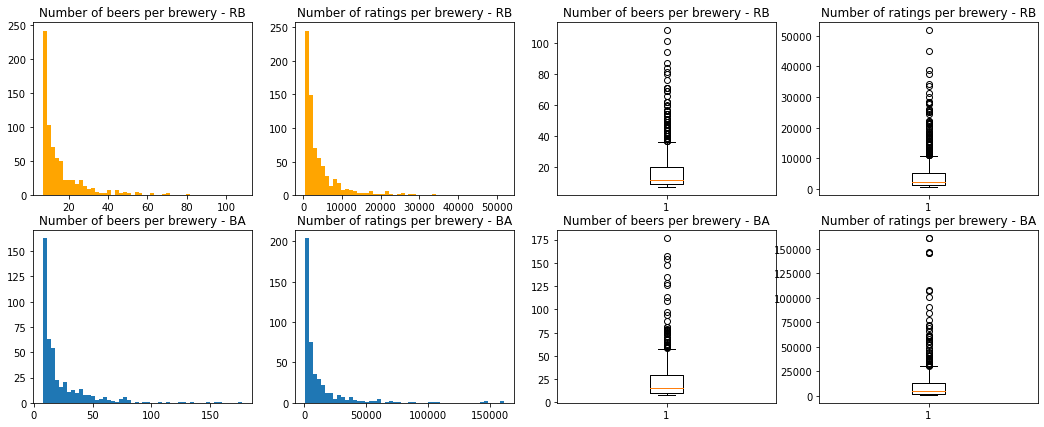

In [348]:
# Visualization of the distribution of the number of beers and ratings with our filtered datasets.
fig = plt.figure(figsize = (18, 7))

# Distribution of the number of beers per brewery on RateBeer
plt.subplot(2,4,1)
plt.hist(new_rb.nbr_beers, bins = 50, color = 'orange')
plt.title('Number of beers per brewery - RB')

# Distribution of the number of ratings per brewery on RateBeer
plt.subplot(2,4,2)
plt.hist(new_rb.nbr_ratings, bins = 50, color = 'orange')
plt.title('Number of ratings per brewery - RB')

# Distribution of the number of beers per brewery on BeerAdvocate
plt.subplot(2,4,5)
plt.hist(new_ba.nbr_beers, bins = 50)
plt.title('Number of beers per brewery - BA')

# Distribution of the number ratings per brewery on BeerAdvocate
plt.subplot(2,4,6)
plt.hist(new_ba.nbr_ratings, bins = 50)
plt.title('Number of ratings per brewery - BA')

# Boxplot of the number of beers per brewery on RateBeer
plt.subplot(2,4,3)
plt.boxplot(new_rb.nbr_beers)
plt.title('Number of beers per brewery - RB')

# Boxplot of the number of ratings per brewery on RateBeer
plt.subplot(2,4,4)
plt.boxplot(new_rb.nbr_ratings)
plt.title('Number of ratings per brewery - RB')

# Boxplot of the number of beers per brewery on BeerAdvocate
plt.subplot(2,4,7)
plt.boxplot(new_ba.nbr_beers)
plt.title('Number of beers per brewery - BA')

# Boxplot of the number ratings per brewery on BeerAdvocate
plt.subplot(2,4,8)
plt.boxplot(new_ba.nbr_ratings)
plt.title('Number of ratings per brewery - BA')
plt.show()

The distribution is still skewed, but we can see on the plots that the data is much more balanced than before. This dataset is satisfying for the moment so we will continue our analysis based on that one. 
<br><br> 
The only last thing we want to do is to merge some informations about the breweries (in the csv files breweries.csv) to the dataset we have just obtained. 

In [375]:
# Merging the informations from breweries
breweries_ba = pd.read_csv('BeerAdvocate/breweries_ba.csv', delimiter = ',')
breweries_ba.drop('nbr_beers', axis=1, inplace=True)
breweries_rb = pd.read_csv('RateBeer/breweries_rb.csv', delimiter = ',')
breweries_rb.drop('nbr_beers', axis=1,inplace=True)
breweries_ba.rename(columns = {'id' : 'brewery_id'}, inplace=True)
breweries_rb.rename(columns = {'id' : 'brewery_id'}, inplace=True)
breweries_rb.head()

,brewery_id,location,name
0,3198,Gabon,Sobraga
1,13538,Northern Ireland,Ards Brewing Co.
2,22304,Northern Ireland,Barrahooley Craft Brewery
3,22818,Northern Ireland,Boundary
4,24297,Northern Ireland,Brewbot Belfast


In [377]:
final_ba = pd.merge(beers_ba_filtered, breweries_ba, how='inner', on=['brewery_id'])
final_rb = pd.merge(beers_rb_filtered, breweries_rb, how='inner', on=['brewery_id'])

final_ba.to_csv('Final/beer_advocate.csv', index=False)
final_rb.to_csv('Final/rate_beer.csv', index=False)

### 5. Deal with NaN values

Some columns may contain NaN values.<br>
We will look at the data to see which one are concerned and what to do with them.

In [ ]:
# Import the pre-processed data
ratings_ba = final_ba #pd.read_csv('Final/beer_advocate.csv', delimiter=',')
ratings_rb = final_rb #pd.read_csv('Final/rate_beer.csv', delimiter=',')

In [10]:
# Check nan values
def nan_ratio(ratings):
    float_columns = list()
    for column in ratings.columns:
        if ratings[column].dtype == float:
            float_columns.append(column)

    N = ratings.shape[0]
    nan_ratio = list()
    for column in float_columns:
        col = ratings[column]
        nb_nan = 0
        for elem in col:
            if not np.isfinite(elem):
                nb_nan+=1
        nan_ratio.append(nb_nan/N)
    return float_columns, nan_ratio

In [ ]:
float_columns_ba, nan_ratio_ba = nan_ratio(ratings_ba)
float_columns_rb, nan_ratio_rb = nan_ratio(ratings_rb)

In [ ]:
print(" --- BeerAdvocate ---")
for col, nan in zip(float_columns_ba, nan_ratio_ba):
    print("Column {:s} has a NaN ratio of {:.2f}%".format(col, nan*100))
    
print("\n --- RateBeer ---")
for col, nan in zip(float_columns_rb, nan_ratio_rb):
    print("Column {:s} has a NaN ratio of {:.2f}%".format(col, nan*100))

We can see that zscore and avg_matched_valid_ratings contain more than 80% of Nan values in both datasets.
And in *BeerAdvocate* dataset the bros_score has more than 75% of Nan values.

As those features only have a few values which will therefore be difficult to interpret we should get rid of them.

In [ ]:
columns_to_delete_ba = ['bros_score', 'zscore', 'avg_matched_valid_ratings']
columns_to_delete_rb = ['zscore', 'avg_matched_valid_ratings']

ratings_ba = ratings_ba.drop(columns_to_delete_ba, axis=1)
ratings_rb = ratings_rb.drop(columns_to_delete_rb, axis=1)

For the other features which only contains a few NaN values we can replace them by the median. Therefore we won't have any problem to deal with them and as there are only a few NaN values it won't modify the data distribution.

In [ ]:
def replace_nan_with_median(ratings, float_columns, delete_columns):
    res = ratings
    for col in float_columns:
        if col not in delete_columns:
            median = np.nanmedian(res[col])
            res[col].fillna(median, inplace=True)

In [ ]:
replace_nan_with_median(ratings_ba, float_columns_ba, columns_to_delete_ba)
replace_nan_with_median(ratings_rb, float_columns_rb, columns_to_delete_rb)

In [ ]:
# Make sure all nan value are gone
print(nan_ratio(ratings_ba))
print(nan_ratio(ratings_rb))

All float columns do not contain NaN values anymore

### 6. Most important breweries

We will now take a look at the most important breweries. Those are the one that we are going to be able to advice.

In [ ]:
# Import breweries data
breweries_rb = pd.read_csv("data/RateBeer/breweries.csv", delimiter=',')
breweries_ba = pd.read_csv("data/BeerAdvocate/breweries.csv", delimiter=',')

In [ ]:
breweries_rb.head()

In [ ]:
breweries_ba.head()

In both datasets breweries have the same columns

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Histogram of RateBeer breweries nbr of beers
subplot = axs[0, 0]
subplot.hist(breweries_rb['nbr_beers'], bins=50)
subplot.set_title('Distribution of RateBeer breweries nbr of beers')

# Boxplot of RateBeer breweries nbr of beers
subplot = axs[0, 1]
subplot.boxplot(breweries_rb['nbr_beers'])
subplot.set_title('Boxplot of RateBeer breweries nbr of beers')

# Distribution of BeerAdvocate breweries nbr of beers
subplot = axs[1, 0]
subplot.hist(breweries_ba['nbr_beers'], bins=50)
subplot.set_title('Distribution of BeerAdvocate breweries nbr of beers')

# Boxplot of BeerAdvocate breweries nbr of beers
subplot = axs[1, 1]
subplot.boxplot(breweries_ba['nbr_beers'])
subplot.set_title('Boxplot of BeerAdvocate breweries nbr of beers')

plt.show()

We can see that *BeerAdvocate* has breweries that contain up to 1200 beers. But in both datasets, the majority of breweries only sell a few beers.

In [ ]:
# First which breweries sell the most beers
def top_k_breweries(breweries_df, k):
    nbr_breweries = breweries_df.shape[0]
    index_sorted = np.argsort(breweries_df['nbr_beers'])
    return breweries_df.iloc[index_sorted[nbr_breweries-k:]]

In [ ]:
# Test : top 10 breweries in RateBeer
top_k_breweries(breweries_rb, 10)

In [ ]:
top_100_breweries_rb = top_k_breweries(breweries_rb, 100)
top_100_breweries_ba = top_k_breweries(breweries_ba, 100)

In [ ]:
# Then we can select the breweries that have the most ratings
def total_nbr_ratings(breweries_df, ratings_df):
    nbr_ratings_list = list()
    for brewery_id in breweries_df['id']:
        nbr_ratings_list.append(sum(ratings_df[ratings_df['brewery_id'] == brewery_id].nbr_ratings))
    return nbr_ratings_list

In [ ]:
breweries_rb['total_nbr_ratings'] = total_nbr_ratings(breweries_rb, ratings_rb)
breweries_ba['total_nbr_ratings'] = total_nbr_ratings(breweries_ba, ratings_ba)

In [ ]:
breweries_rb.head()

It seems that some breweries are not rated, let's check out how many

In [ ]:
index_not_rated_breweries = np.where(breweries_rb['total_nbr_ratings'] == 0)
N = breweries_rb.shape[0]
ratio_not_rated_rb = len(index_not_rated_breweries[0]) / N
print("In RateBeer {:.2f}% of breweries are not rated".format(ratio_not_rated_rb*100))

index_not_rated_breweries = np.where(breweries_ba['total_nbr_ratings'] == 0)
N = breweries_ba.shape[0]
ratio_not_rated_ba = len(index_not_rated_breweries[0]) / N
print("In BeerAdvocate {:.2f}% of breweries are not rated".format(ratio_not_rated_ba*100))

We can see here that most breweries are not rated therefore those breweries won't be useful to analyze.<br>
Now we can then see which are the most popular breweries, which are the one obtaining most ratings.

In [ ]:
def top_k_rated_breweries(breweries_df, k):
    nbr_breweries = breweries_df.shape[0]
    index_sorted = np.argsort(breweries_df['total_nbr_ratings'])
    return breweries_df.iloc[index_sorted[nbr_breweries-k:]]

In [ ]:
# Test : top 10 breweries in RateBeer
top_k_rated_breweries(breweries_rb, 10)

In [ ]:
top_100_rated_breweries_rb = top_k_rated_breweries(breweries_rb, 100)
top_100_rated_breweries_ba = top_k_rated_breweries(breweries_ba, 100)

In [ ]:
# Plot the average number of beers for both top k methods
def avg_nbr_beers(breweries_df, k_min=10, k_max=200, k_step=10):
    avg_method1 = list()
    avg_method2 = list()
    k_values = list()

    for k in range(k_min, k_max, k_step):
        top_k1 = top_k_breweries(breweries_df, k)
        top_k2 = top_k_rated_breweries(breweries_df, k)

        avg1 = top_k1['nbr_beers'].mean()
        avg2 = top_k2['nbr_beers'].mean()

        avg_method1.append(avg1)
        avg_method2.append(avg2)
        k_values.append(k)
        
    return k_values, avg_method1, avg_method2

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Variation of the mean number of beers depending on k for RateBeer
subplot = axs[0]
k_values, avg_method1, avg_method2 = avg_nbr_beers(breweries_rb)
subplot.plot(k_values, avg_method1, label='Method 1')
subplot.plot(k_values, avg_method2, label='Method 2')
subplot.legend()
subplot.set_title('Variation of the mean number of beers depending on k for RateBeer')

# Variation of the mean number of beers depending on k for BeerAdvocate
subplot = axs[1]
k_values, avg_method1, avg_method2 = avg_nbr_beers(breweries_ba)
subplot.plot(k_values, avg_method1, label='Method 1')
subplot.plot(k_values, avg_method2, label='Method 2')
subplot.legend()
subplot.set_title('Variation of the mean number of beers depending on k for BeerAdvocate')

plt.show()

From those graphs we can see that in both datasets the method 1 as a higher mean value for the number of beers which means that the breweries with the most beers are not the one with the most ratings. Moreover, with the method 2 the breweries selected still sell many beers and will therefore still be interesting to advice.

In conclusion we will use the second method to determine the top beers.